Author: Faridat Lawal

# Stroke Prediction

## Import Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Read and Store Dataset

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

Stroke variable is called to visualize dataset. There are **5110 rows** and **12 columns**. Of those 12 columns we have **8 categorical** attributes and **4 numerical** attributes.

In [3]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Info function is called to display data type of all attributes in dataset. 

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Preprocessing

Convert "Age" to Int type and "Gender", "Hypertension", "Heart_Disease", "Ever_Married",  "Work_Type", "Residence_Type", "Smoking_Status" and "Stroke" to Category type.

In [5]:
stroke['age'] = stroke['age'].astype('int')
stroke['gender'] = stroke['gender'].astype('category')
stroke['hypertension'] = stroke['hypertension'].astype('category')
stroke['heart_disease'] = stroke['heart_disease'].astype('category')
stroke['ever_married'] = stroke['ever_married'].astype('category')
stroke['work_type'] = stroke['work_type'].astype('category')
stroke['Residence_type'] = stroke['Residence_type'].astype('category')
stroke['smoking_status'] = stroke['smoking_status'].astype('category')
stroke['stroke'] = stroke['stroke'].astype('category')

Value counts of all categorical attributes are examined for any descrepancies. 

In [8]:
print(stroke.gender.value_counts())
print(stroke.hypertension.value_counts())
print(stroke.heart_disease.value_counts())
print(stroke.ever_married.value_counts())
print(stroke.work_type.value_counts())
print(stroke.Residence_type.value_counts())
print(stroke.smoking_status.value_counts())
print(stroke.stroke.value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


"Other" is removed from Gender category since count is insignificant. 

In [9]:
stroke.gender.value_counts(normalize=False)
stroke = stroke[stroke.gender != 'Other']

In [10]:
print(stroke.gender.value_counts())

Female    2994
Male      2115
Other        0
Name: gender, dtype: int64


Stroke dataset is checked for missing values. Since only **3%** of information is missing from BMI, the missing values will be dropped.

In [11]:
stroke.isna().sum()*100/len(stroke)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.934234
smoking_status       0.000000
stroke               0.000000
dtype: float64

"Id" column is dropped as it is irreleavant to question at hand. Missing values are dropped/ removed from dataset and dataset is stored as a new variable name. 

In [12]:
stroke = stroke.drop(['id'], axis=1)
strokedf=stroke.dropna()
strokedf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Convert non-binary categorical columns into Dummy variables for model evaluations. Create new dataframe with dummy variables.

In [19]:
sdf = pd.concat([pd.get_dummies(strokedf[['gender','ever_married',
                'work_type','Residence_type','smoking_status']]),
                 strokedf[['age','hypertension','heart_disease',
            'avg_glucose_level','bmi','stroke']]], axis=1)
sdf.drop(['gender_Other'], axis =1)

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,67,0,1,228.69,36.6,1
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,80,0,1,105.92,32.5,1
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,49,0,0,171.23,34.4,1
4,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,79,1,0,174.12,24.0,1
5,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,81,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,1,0,0,0,0,0,1,1,...,1,0,0,0,13,0,0,103.08,18.6,0
5106,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,81,0,0,125.20,40.0,0
5107,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,35,0,0,82.99,30.6,0
5108,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,51,0,0,166.29,25.6,0


***Note*** After preprocessing, the final shape of the dataset is *4908 rows* and *21 columns*.

## Correlation Map

With the use of the Seaborn package, a correlation matrix is created to visualize feature importance. 

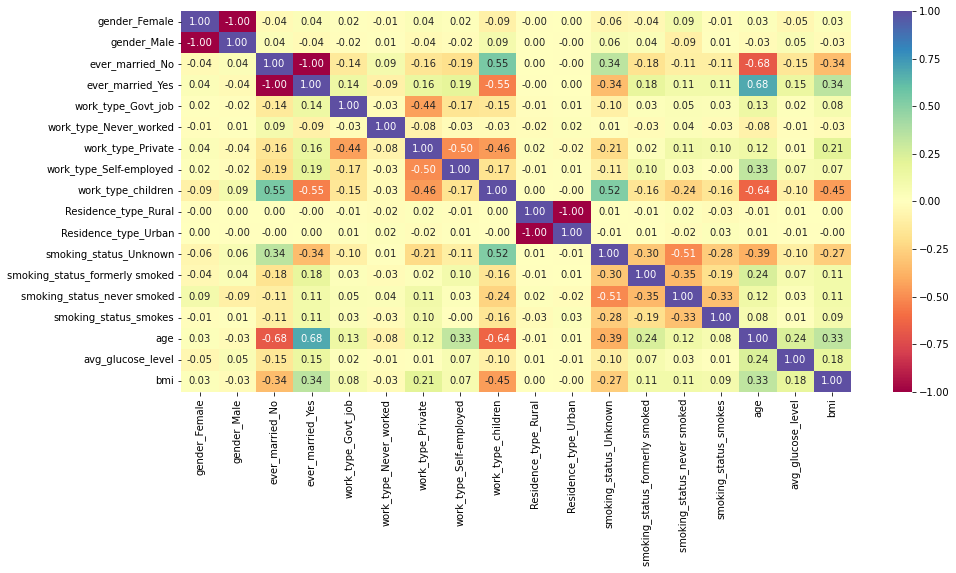

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    sdf.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Insights:**

* Small Positive correlation between Age and WorkType,  Smoking Status, Avg Glucose Level, BMI.
* Medium Positive correlation between Age and Marital Status (yes).
* Medium Negative correlation between Age and Marital Status (no).

## EDA

Bar plots and Histograms are utilized to explore and visualize the relationship between our input features and our target ouput. The Seaborn package is employed to carry out this analysis. 

##### Smoking Status

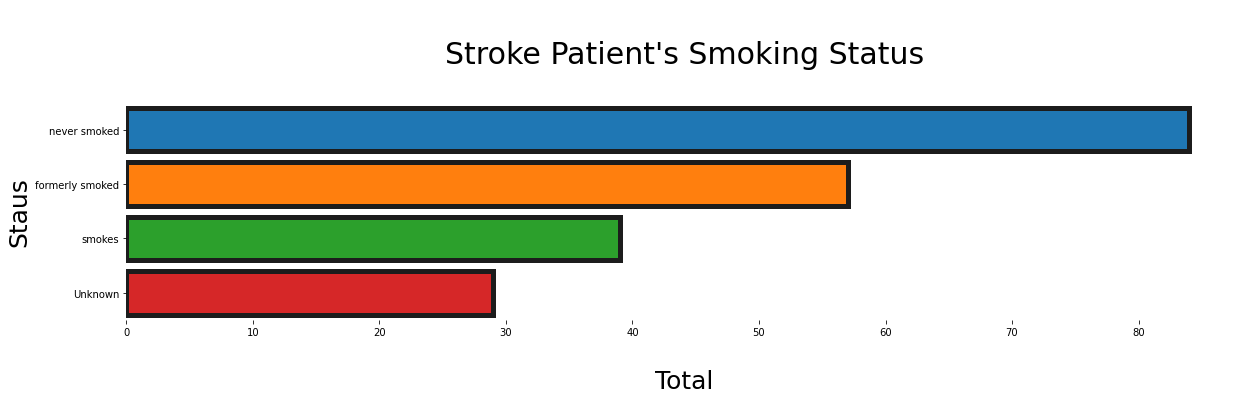

In [37]:
plt.subplots(figsize=(20, 4))
p=sns.countplot(y=strokedf[strokedf["stroke"] == 1]["smoking_status"],order=strokedf[strokedf["stroke"] == 1]["smoking_status"].value_counts(ascending=False).index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nStroke Patient's Smoking Status\n",fontsize=30)
p.set_ylabel("Status",fontsize=25)
p.set_xlabel("\nTotal",fontsize=25)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
sns.despine(left=True, bottom=True)

**Insights:**

* Most of the Stroke patients have Never smoked while some have smoked previously. 
* The Stroke patients who do smoke are half of 

This was not expected and I found it most surprising.


##### Age Distribution

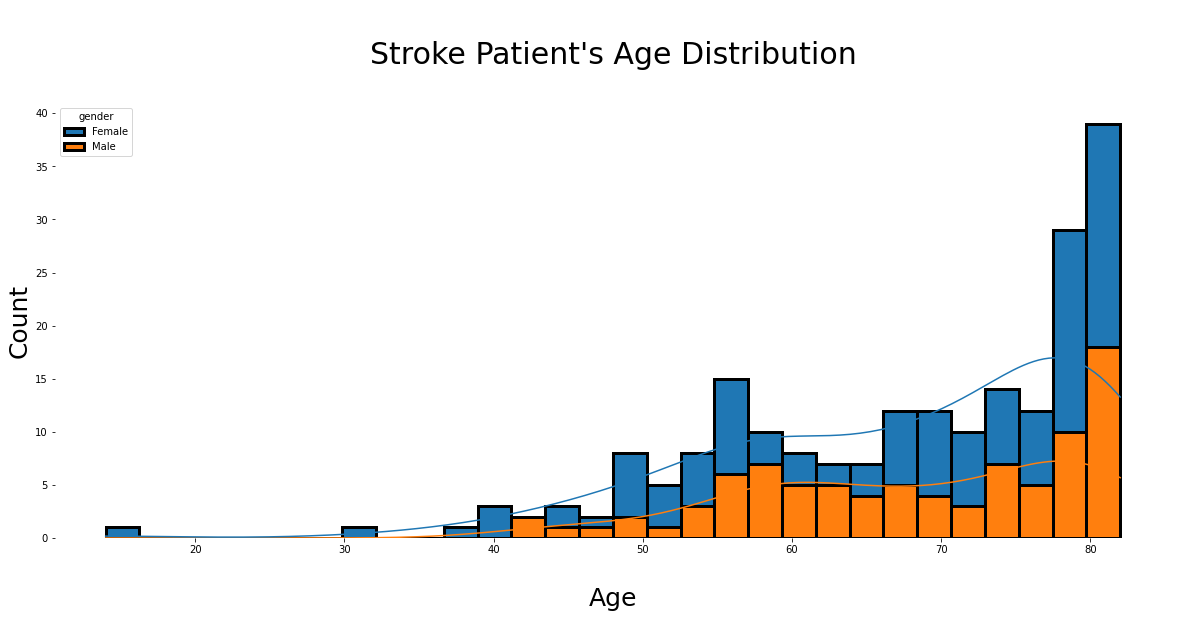

In [28]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=strokedf[strokedf['stroke']== 1], x="age", hue='gender', multiple="stack", kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

**Insights:**

* We can see the stroke patient's age distribution is left skewed. Most of the patients  fall in between **60 years** to about **~ 85 years**.
* There also appears to be some young stroke patients who are female.

##### BMI Distribution

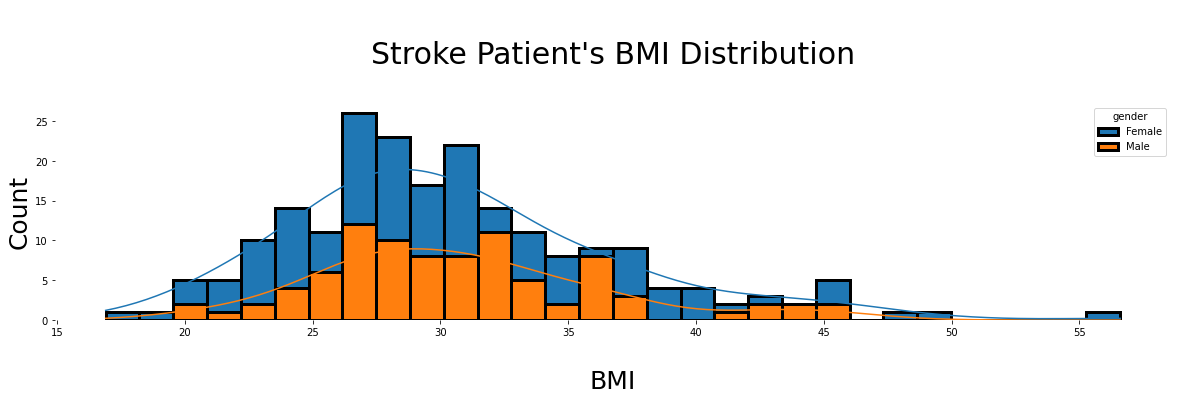

In [39]:
plt.subplots(figsize=(20, 4))
p = sns.histplot(data=strokedf[strokedf['stroke']== 1], x="bmi", hue='gender', multiple="stack", kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nBMI",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

**Insights:**

* We can see the stroke patient's BMI distribution appears to be right-skewed. Most of the patients fall between a BMI value of 25 to 35.
* It can be said an average persons' BMI is between 18-25 and anything above 25 is considered overweight.
* An observation can be made that the majority of Stroke patients are overweight.  

##### Heart Disease

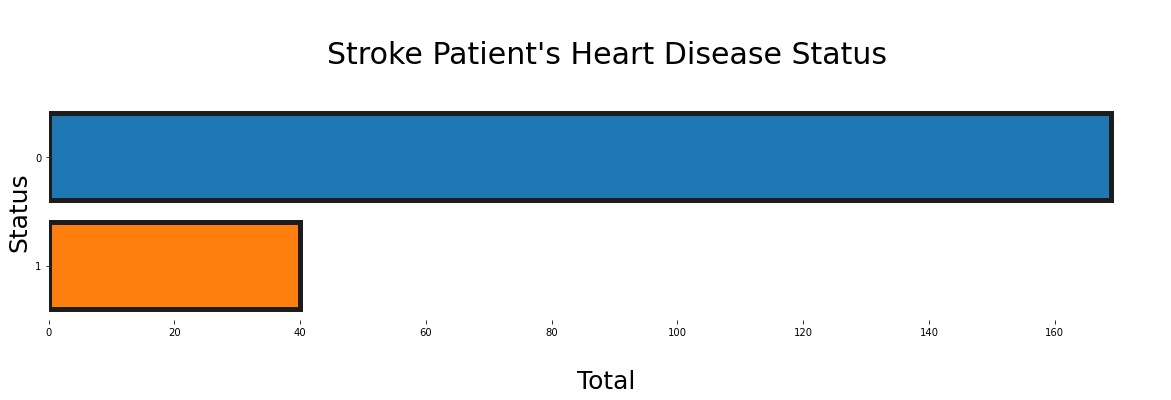

In [40]:
plt.subplots(figsize=(20, 4))
p=sns.countplot(y=strokedf[strokedf["stroke"] == 1]["heart_disease"],order=strokedf[strokedf["stroke"] == 1]["heart_disease"].value_counts(ascending=False).index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nStroke Patient's Heart Disease Status\n",fontsize=30)
p.set_ylabel("Status",fontsize=25)
p.set_xlabel("\nTotal",fontsize=25)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
sns.despine(left=True, bottom=True)

**Insights:**

* Majority of the stroke patients do not have heart disease.

This is another surprising observation I found. 

# Model Evaluations

Packages and Libraries needed for model evalutions are imported. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Data is prepared for training and testing by storing all input features in the variable **"X"** and our target output in the variable **"y"**.

In [20]:
X = sdf.iloc[:,:20]

y = sdf.iloc[:,-1]

Data is then split into training and testing, where **60%** of data is reserved for training and the remaining **40%** is reserved for testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [22]:
X_train

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level
4646,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,63,0,0,93.88
4898,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,12,0,0,132.85
1972,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,39,0,0,122.91
1652,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,70,0,0,66.85
4989,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,11,0,0,123.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,78,0,0,61.38
511,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,51,0,0,82.93
3248,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,35,1,0,94.20
3947,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,61,0,0,116.78


In [23]:
X_test

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level
4857,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,32,0,0,102.13
3709,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,42,0,0,84.03
964,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,66,1,0,74.90
2971,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,21,0,0,71.06
3262,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,47,0,0,88.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,18,0,0,73.29
2587,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,39,0,0,71.30
466,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,61,1,0,170.05
4448,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,78,0,0,83.20


##### Multinomial Naïve Bayes Classifier

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1651
           1       0.47      0.14      0.22       313

    accuracy                           0.84      1964
   macro avg       0.66      0.56      0.56      1964
weighted avg       0.80      0.84      0.80      1964



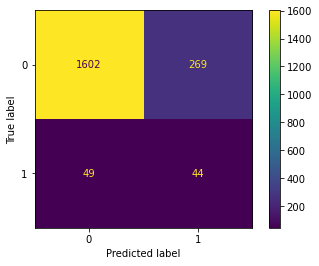

In [50]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

cmplt = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmplt.plot()
print(classification_report(y_pred, y_test))

**Findings:**

* Model Accuracy is 84% with a Precision of 86% and Recall of 97%.
* When a patient is predicted to have a stroke it is correct 86% of the time.
* The Multinomial Naïve Bayes classifier correctly identifies 97% of all stroke patients.

##### K-Nearest Neaighbor Classifier

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1467
           1       0.00      0.00      0.00         6

    accuracy                           0.95      1473
   macro avg       0.50      0.48      0.49      1473
weighted avg       0.99      0.95      0.97      1473



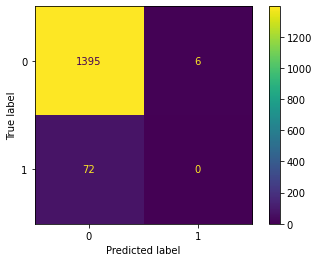

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)

cmplt_knn = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds_knn))
cmplt_knn.plot()

print(classification_report(y_preds_knn, y_test))

**Findings:**

* Model Accuracy is 95% with a Precision of 100% and Recall of 95%.
* When a patient is predicted to have a stroke it is correct 100% of the time.
* The K-Nearest Neighbor classifier correctly identifies 95% of all stroke patients.

##### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1393
           1       0.10      0.09      0.09        80

    accuracy                           0.91      1473
   macro avg       0.52      0.52      0.52      1473
weighted avg       0.90      0.91      0.90      1473



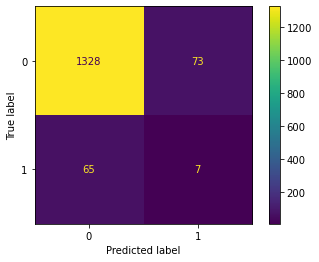

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preds_dt = dt.predict(X_test)


cmplt_dt = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds_dt))
cmplt_dt.plot()
print(classification_report(y_preds_dt, y_test))

**Findings:**

* Model Accuracy is 91% with a Precision of 95% and Recall of 95%.
* When a patient is predicted to have a stroke it is correct 95% of the time.
* The Decision Tree classifier correctly identifies 95% of all stroke patients.

##### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1469
           1       0.01      0.25      0.03         4

    accuracy                           0.95      1473
   macro avg       0.51      0.60      0.50      1473
weighted avg       1.00      0.95      0.97      1473



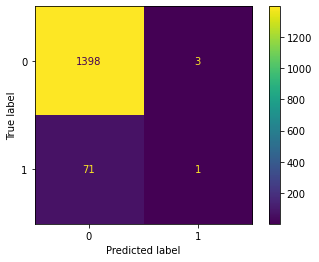

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_preds_rfc = rfc.predict(X_test)

cmplt_rfc = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds_rfc))
cmplt_rfc.plot()
print(classification_report(y_preds_rfc, y_test))

**Findings:**

* Model Accuracy is 95% with a Precision of 100% and Recall of 95%.
* When a patient is predicted to have a stroke it is correct 100% of the time.
* The Random Forest classifier correctly identifies 95% of all stroke patients.

Final results are compiled to create a dataframe.

In [24]:
# Create dictionary with key, value pair for overall table with  values for each classifier
info = {'Classifiers':['Multinomial NB', 'KNN', 'Decision Tree', 'Random Forest'],
        'Accuracy':['84%', '95%', '91%', '95%'],
        'Precision':['86%', '100%', '95%', '100%'],
        'Recall':["97%", '95%', '95%', '95%']}
compare = pd.DataFrame(info)
compare

,Classifiers,Accuracy,Precision,Recall
0,Multinomial NB,84%,86%,97%
1,KNN,95%,100%,95%
2,Decision Tree,91%,95%,95%
3,Random Forest,95%,100%,95%
